# Hypothesis Analysis

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Data

In [2]:
with open('../data/hurricanes_cleaned.pkl', 'rb') as handle:
    hurricanes = pickle.load(handle)

In [3]:
hurricanes

{'AL011851': {'name': 'UNNAMED',
  'datapoints': [{'record_date': '18510625',
    'time': '0000',
    'storm_status': 'HU',
    'lat': 28.0,
    'lon': -94.8,
    'max_wind': '80',
    'min_pressure': '-999',
    'category': 1,
    'dt': datetime.datetime(1851, 6, 25, 0, 0)},
   {'record_date': '18510625',
    'time': '0600',
    'storm_status': 'HU',
    'lat': 28.0,
    'lon': -95.4,
    'max_wind': '80',
    'min_pressure': '-999',
    'category': 1,
    'dt': datetime.datetime(1851, 6, 25, 6, 0)},
   {'record_date': '18510625',
    'time': '1200',
    'storm_status': 'HU',
    'lat': 28.0,
    'lon': -96.0,
    'max_wind': '80',
    'min_pressure': '-999',
    'category': 1,
    'dt': datetime.datetime(1851, 6, 25, 12, 0)},
   {'record_date': '18510625',
    'time': '1800',
    'storm_status': 'HU',
    'lat': 28.1,
    'lon': -96.5,
    'max_wind': '80',
    'min_pressure': '-999',
    'category': 1,
    'dt': datetime.datetime(1851, 6, 25, 18, 0)},
   {'record_date': '18510625',


## 2. Hypothesis Analysis 
### Hypothesis 1: Storms are making more frequent landfalls due to increased strength and duration of systems.
We will focus our analysis on the following metrics to understand hurricane activity across different periods of time. 
* Number of storms
* Strong storms (hurricane status)
* Number of landfalls
* Average duration of storms

In [4]:
def get_specific_years(hurricane_data, year_start, year_end):
    """
    Takes an input of the JSON data with hurricane ID as key
    Returns an array of dicts for the range (inclusive).
    """
    year_range = range(year_start, year_end)

    filtered_data = [storm_data for storm_id, storm_data in hurricane_data.items() if storm_data['year'] in year_range]
    
    return filtered_data

def period_metrics(period_name, hurr_list):
    """
    Given a list of hurricanes, this function will calculate metrics for
    that entire list, including number of storms, average duration of storms, 
    number of hurricanes, number of landfall, and values normalized into percentages.
    """
    # 1. Number of storms
    num_storms = len(hurr_list)

    # 2. Average duration of storms
    duration_list = []
    for storm in hurr_list:
        duration_list.append(storm['duration'])
    duration_mean_days = np.mean(duration_list).days

    # 3. Number of hurricanes and storm landfalls
    num_hurricanes = sum([1 for storm in hurr_list if storm['is_hurricane']==True])
    num_landfalls = sum([1 for storm in hurr_list if storm['landfall']==True])
    
    # 4. Normalized percentages for hurricanes landfalls
    pct_landfall = num_landfalls / num_storms
    pct_hurricanes = num_hurricanes / num_storms

    metrics_dict = {'period': period_name,
                'num_storms': num_storms, 
                'avg_duration_days': duration_mean_days, 
                'num_hurricanes': num_hurricanes, 
                'pct_hurricanes': pct_hurricanes, 
                'num_landfalls': num_landfalls, 
                'pct_landfall': pct_landfall}
    
    return metrics_dict

def create_list_of_periods(yr_to_start, yr_to_end, interval):
    """
    Creates an array of dictionaries with the range of the period
    based on the inputted years and interval.
    E.g. for 10 year periods in the years 1917-2017:
        yr_to_start = 1917
        yr_to_end = 2017
        interval = 10
    """
    periods = []
    for yr in list(range(yr_to_start, yr_to_end, interval)):
        start = yr + 1 # to avoid overlapping years across periods
        end = yr + interval
        periods.append({'name': f"{start}-{end}", 'start': start, 'end': end})
        
    return periods

### Analyze Historical Averages for 10-year periods
In the 100-year period between 1918-2017, we will analyze the key statistics of each 10-year sub-period (e.g. 1918-1927, 1928-1937, etc).

#### Obtain history

In [5]:
periods_10yr = create_list_of_periods(1917, 2017, 10)

# Calculate metrics for each period
metrics_10yr = []
for period in periods_10yr:
    hurricane_list = get_specific_years(hurricanes, period['start'], period['end'])
    hurr_latest_metrics = period_metrics(period['name'], hurricane_list)
    metrics_10yr.append(hurr_latest_metrics)

In [6]:
# Convert it into a dataframe to make it easy to read
hurricane_stats_10yr = pd.DataFrame(metrics_10yr)
hurricane_stats_10yr

avg_duration_days  num_hurricanes  num_landfalls  num_storms  \
0                  7              36              3          63   
1                  7              48              4         100   
2                  5              42              2          83   
3                  6              64             11         120   
4                  7              53              8          88   
5                  5              50             15         185   
6                  5              47             12         142   
7                  6              55             17         128   
8                  7              75             13         158   
9                  7              59             16         140   

   pct_hurricanes  pct_landfall     period  
0        0.571429      0.047619  1918-1927  
1        0.480000      0.040000  1928-1937  
2        0.506024      0.024096  1938-1947  
3        0.533333      0.091667  1948-1957  
4        0.602273      0.090909  1958-1967  
5        0.270270      0.081081  1968-1977  
6        0.330986      0.084507  1978-1987  
7        0.429688      0.132812  1988-1997  
8        0.474684      0.082278  1998-2007  
9        0.421429      0.114286  2008-2017

#### Visualize
We will start by visualizing absolute values (number of hurricanes, storms, etc).

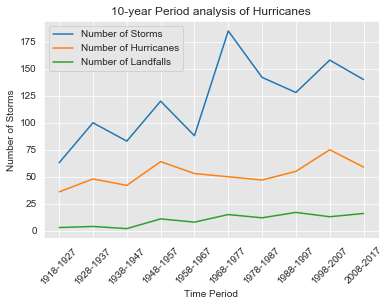

In [7]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax_abs_10yr = sns.lineplot(x="period", y="num_storms", label='Number of Storms', data=hurricane_stats_10yr)
ax_abs_10yr = sns.lineplot(x="period", y="num_hurricanes", label='Number of Hurricanes', data=hurricane_stats_10yr)
ax_abs_10yr = sns.lineplot(x="period", y="num_landfalls", label='Number of Landfalls', data=hurricane_stats_10yr)
ax_abs_10yr.set_title("10-year Period analysis of Hurricanes")
ax_abs_10yr.set(xlabel='Time Period', ylabel='Number of Storms')

for item in ax_abs_10yr.get_xticklabels():
    item.set_rotation(45)

Now, lets visualize the percentage-adjusted metrics (percentage of storms as hurricanes, landfall, etc.) to get a better sense of whether there are more powerful storms now compared to historically.

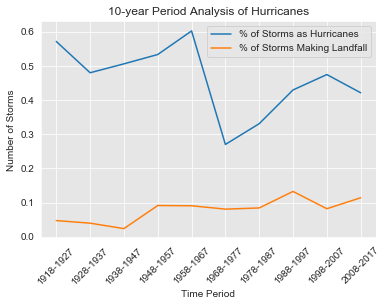

In [8]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax_pct_10yr = sns.lineplot(x="period", y="pct_hurricanes", label='% of Storms as Hurricanes', data=hurricane_stats_10yr)
ax_pct_10yr = sns.lineplot(x="period", y="pct_landfall", label='% of Storms Making Landfall', data=hurricane_stats_10yr)
ax_pct_10yr.set_title("10-year Period Analysis of Hurricanes")
ax_pct_10yr.set(xlabel='Time Period', ylabel='Percentage')

for item in ax_pct_10yr.get_xticklabels():
    item.set_rotation(45)

### Analyze Historical Averages for 5-year periods

It would be interesting to see if more granular intervals can also capture the general trend of climate change, or whether this range may just be too small to notice anything meaningful due to the variability of hurricanes. This would be 5-year sub-periods (e.g. 1918-1922, 1923-1927, etc).

In [9]:
periods_5yr = create_list_of_periods(1917, 2017, 5)

# Calculate metrics for each period
metrics_list = []
for period in periods_5yr:
    hurricane_list = get_specific_years(hurricanes, period['start'], period['end'])
    hurr_latest_metrics = period_metrics(period['name'], hurricane_list)
    metrics_list.append(hurr_latest_metrics)

In [10]:
hurricane_stats_5yr = pd.DataFrame(metrics_list)
hurricane_stats_5yr

avg_duration_days  num_hurricanes  num_landfalls  num_storms  \
0                   6              15              0          23   
1                   7              18              3          35   
2                   6              12              1          27   
3                   7              30              2          58   
4                   6              17              1          30   
5                   5              21              1          42   
6                   7              32              6          54   
7                   6              27              2          55   
8                   7              26              3          45   
9                   8              24              4          38   
10                  5              27              9          85   
11                  4              20              4          81   
12                  5              26              9          84   
13                  5              19              3          50   
14                  6              24             10          62   
15                  7              27              5          56   
16                  6              35              5          66   
17                  7              36              8          78   
18                  6              30              5          69   
19                  7              19              9          52   

    pct_hurricanes  pct_landfall     period  
0         0.652174      0.000000  1918-1922  
1         0.514286      0.085714  1923-1927  
2         0.444444      0.037037  1928-1932  
3         0.517241      0.034483  1933-1937  
4         0.566667      0.033333  1938-1942  
5         0.500000      0.023810  1943-1947  
6         0.592593      0.111111  1948-1952  
7         0.490909      0.036364  1953-1957  
8         0.577778      0.066667  1958-1962  
9         0.631579      0.105263  1963-1967  
10        0.317647      0.105882  1968-1972  
11        0.246914      0.049383  1973-1977  
12        0.309524      0.107143  1978-1982  
13        0.380000      0.060000  1983-1987  
14        0.387097      0.161290  1988-1992  
15        0.482143      0.089286  1993-1997  
16        0.530303      0.075758  1998-2002  
17        0.461538      0.102564  2003-2007  
18        0.434783      0.072464  2008-2012  
19        0.365385      0.173077  2013-2017

#### Visualize
We will start by visualizing absolute values (number of hurricanes, storms, etc).

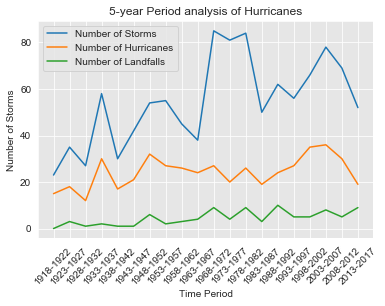

In [11]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax_abs_5yr = sns.lineplot(x="period", y="num_storms", label='Number of Storms', data=hurricane_stats_5yr)
ax_abs_5yr = sns.lineplot(x="period", y="num_hurricanes", label='Number of Hurricanes', data=hurricane_stats_5yr)
ax_abs_5yr = sns.lineplot(x="period", y="num_landfalls", label='Number of Landfalls', data=hurricane_stats_5yr)
ax_abs_5yr.set_title("5-year Period analysis of Hurricanes")
ax_abs_5yr.set(xlabel='Time Period', ylabel='Number of Storms')

for item in ax_abs_5yr.get_xticklabels():
    item.set_rotation(45)

Now, lets visualize the percentage-adjusted metrics (percentage of storms as hurricanes, landfall, etc.) to get a better sense of whether there are more powerful storms now compared to historically.

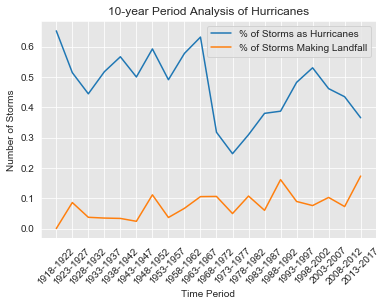

In [12]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
ax_pct_5yr = sns.lineplot(x="period", y="pct_hurricanes", label='% of Storms as Hurricanes', data=hurricane_stats_5yr)
ax_pct_5yr = sns.lineplot(x="period", y="pct_landfall", label='% of Storms Making Landfall', data=hurricane_stats_5yr)
ax_pct_5yr.set_title("10-year Period Analysis of Hurricanes")
ax_pct_5yr.set(xlabel='Time Period', ylabel='Percentage')

for item in ax_pct_5yr.get_xticklabels():
    item.set_rotation(45)

### TODO: 
* Anaysis of stats above
* Filter by storm for each state hit